In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from sklearn import preprocessing
import wfdb
import copy as cp
import scipy.signal as signal
from scipy import stats
from sklearn import preprocessing
from tqdm import tqdm
import os
import re
import pandas as pd
import pickle
import csv

In [4]:
rlist = []
records = os.path.normpath('mit-bih-dataframes/subject_list.csv')
with open(records) as rfile:
    recordreader = csv.reader(rfile, delimiter=' ', quotechar='|')
    for row in recordreader:
        rlist.append(row[0])

In [5]:
subject_dataframes = []
for x in tqdm(rlist):
    subject_dataframes.append(pd.read_csv(os.path.normpath('mit-bih-dataframes/'+x+'.csv'), index_col=0))

subject_dataframes[22].tail()

100%|███████████████████████████████████████████| 23/23 [01:27<00:00,  3.80s/it]


,Signal 1,Signal 2,R-Peak,Normal,AFIB,Other
9205755,-0.26,-0.580,False,False,True,False
9205756,-0.22,-0.525,False,False,True,False
9205757,-0.24,-0.520,False,False,True,False
9205758,-0.30,-0.520,False,False,True,False
9205759,-0.27,-0.565,False,False,True,False


In [17]:
def plot_signals(subjdf, samples = 1000):
    signal1 = subjdf.iloc[:samples]['Signal 1']

    in_seconds = []
    for x in range(samples):
        in_seconds.append(x/250)

    plt.figure(figsize = (48, 8))
    plt.plot(in_seconds, signal1, label = "ECG1 Signal", linewidth=7, color="black")
    #plt.plot(in_seconds, signal2, label = "ECG2 Signal")

    plt.xlabel('Time (seconds)')
    plt.ylabel('Signal Frequency')

    #plt.legend(fontsize='large')

    #plt.title('First '+str(samples)+' Samples from Signals 1 and 2')

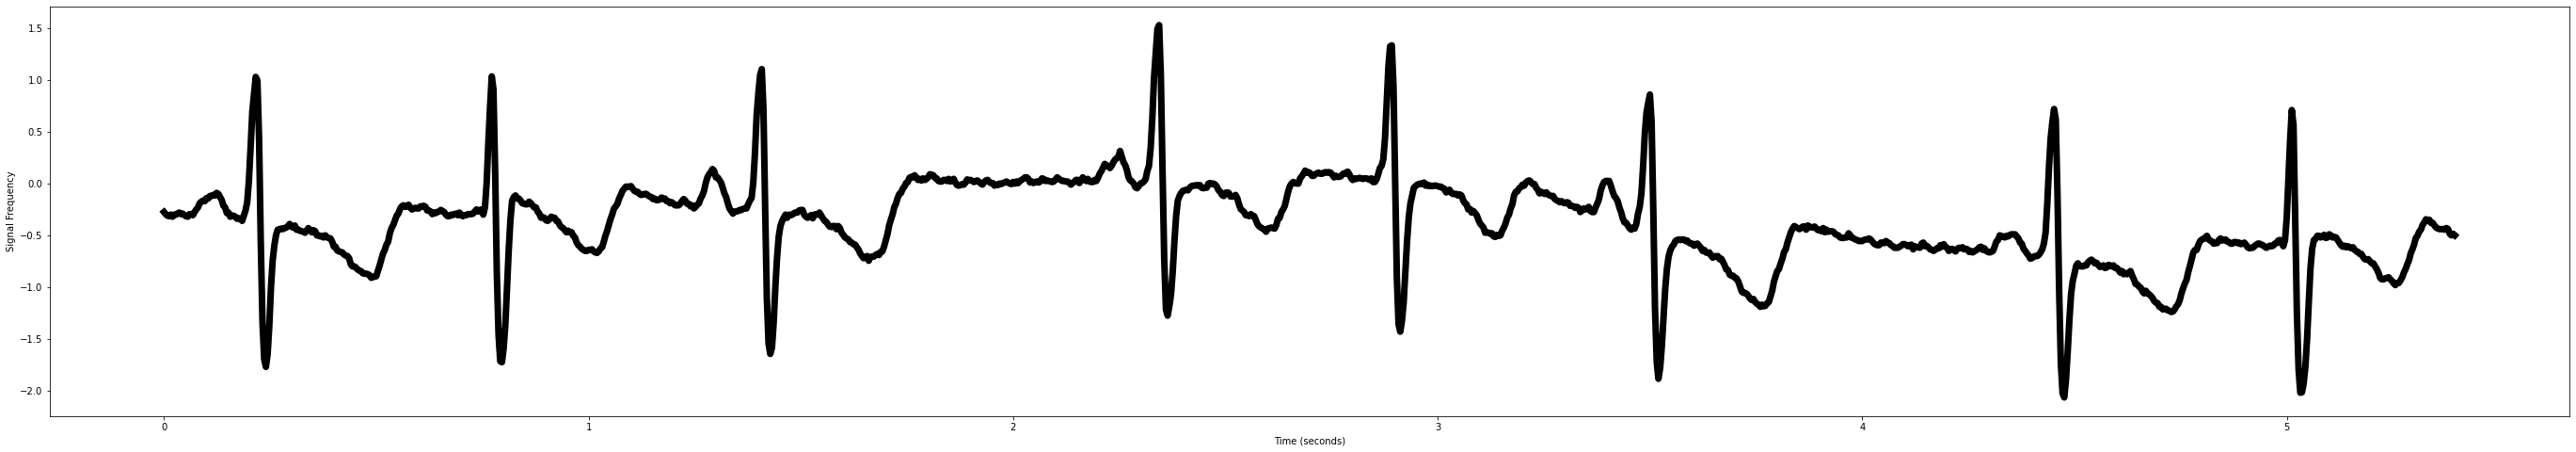

In [18]:
plot_signals(subject_dataframes[0], 1350)